## TRAINING AND TESTING MNIST HANDWRITTEN DATASET



In [73]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [74]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")  # load dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()  #split into tetsing and training

In [4]:
train_images.shape

(60000, 28, 28)

In [75]:
test_images.shape

(10000, 28, 28)

5


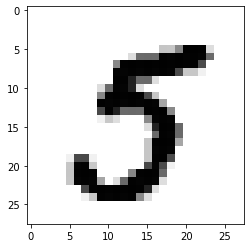

In [76]:
digit_index= 59800
print(train_labels[digit_index])
plt.imshow(train_images[digit_index], cmap='Greys')

6


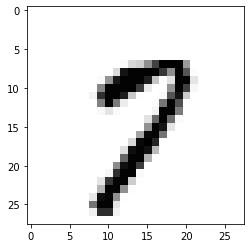

In [62]:
digit_index= 9999
print(test_labels[digit_index])
plt.imshow(train_images[digit_index], cmap='Greys')

In [18]:
train_images[255,27,13]  # let's have a look at one pixel

0

In [22]:
train_labels[:14]  # let's have a look at the first 14 training labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6], dtype=uint8)

In [23]:
class_names = ['zero','one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']  #Our labels are integers ranging from 0 - 9. Each integer represents a specific handwritten number.

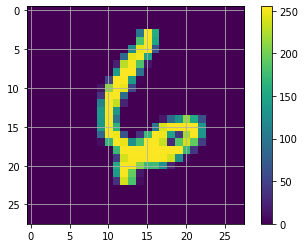

In [49]:
plt.figure()
plt.imshow(train_images[59000])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='sigmoid'),  # hidden layer (2)
    keras.layers.Dense(11, activation='softmax') # output layer (3)
])

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(train_images, train_labels, epochs= 11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5146 - accuracy: 0.8621
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.9014
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9101
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.9140
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2716 - accuracy: 0.9180
Epoch 6/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2643 - accuracy: 0.9196
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9223
Epoch 8/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9249
Epoch 9/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2426 - accuracy: 0.9271
Epoch 10/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [80]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2296 - accuracy: 0.9282
Test accuracy: 0.9282000064849854


In [41]:
predictions = model.predict(test_images)

In [43]:
predictions[1]

array([2.3757337e-04, 6.1971230e-05, 9.9809688e-01, 1.4423179e-03,
       3.3552374e-07, 7.1704890e-06, 8.5604581e-05, 3.3379456e-07,
       6.7694586e-05, 9.0490339e-08], dtype=float32)

In [44]:
np.argmax(predictions[0])

7

In [57]:
test_labels[0]

7

Pick a number: 3


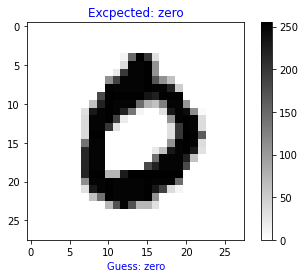

In [59]:
COLOR = 'blue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['zero','one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
